In [17]:
import pandas as pd
import seaborn as sns

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_Prac_Proj_1/data/final_data.csv')
print(df.head())

            user                 time        lat         lon    city  \
0  USER_79321756  2010-03-03T04:15:26  47.528139 -122.197916  Renton   
1  USER_79321756  2010-03-03T04:55:32  47.528139 -122.197916  Renton   
2  USER_79321756  2010-03-03T05:13:34  47.528139 -122.197916  Renton   
3  USER_79321756  2010-03-03T05:28:02  47.528139 -122.197916  Renton   
4  USER_79321756  2010-03-03T05:56:13  47.528139 -122.197916  Renton   

        state                                               text  
0  Washington  RT @USER_2ff4faca: IF SHE DO IT 1 MORE TIME......  
1  Washington  @USER_77a4822d @USER_2ff4faca okay:) lol. Sayi...  
2  Washington  RT @USER_5d4d777a: YOURE A FAG FOR GETTING IN ...  
3  Washington  @USER_77a4822d yea ok..well answer that cheap ...  
4  Washington  A sprite can disappear in her mouth - lil kim ...  


In [20]:
import re

# Function to clean text
def clean_text(text):
    # Handle non-string values by converting to string
    if not isinstance(text, str):
        text = str(text)  # Convert to string if not already

    # Remove mentions (@USER_...) and URLs
    text = re.sub(r'@[\w]+', '', text)  # Remove @mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'#\S+', '', text)    # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters (keeping spaces)
    text = text.lower()  # Convert to lowercase
    return text

In [21]:
# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)
# Display the DataFrame to see the cleaned text
print(df[['text', 'cleaned_text']])

                                                     text  \
0       RT @USER_2ff4faca: IF SHE DO IT 1 MORE TIME......   
1       @USER_77a4822d @USER_2ff4faca okay:) lol. Sayi...   
2       RT @USER_5d4d777a: YOURE A FAG FOR GETTING IN ...   
3       @USER_77a4822d yea ok..well answer that cheap ...   
4       A sprite can disappear in her mouth - lil kim ...   
...                                                   ...   
377605                    @USER_6771261c Thanxx pumpkinnn   
377606                            Oooh and the Nudiesssss   
377607   I just wanna sing!!!!! Its maddd people here! =(   
377608  ThanxXx babyluvv RT @USER_d18b3d00: @USER_8c70...   
377609  Tonight will be the night that u can get slapp...   

                                             cleaned_text  
0       rt  if she do it  more timeima knock her damn ...  
1         okay lol saying ok to both of yall about to ...  
2       rt  youre a fag for getting in the middle of t...  
3        yea okwell answer 

In [22]:
import nltk
nltk.download('vader_lexicon')

import re
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound score gives a single value that summarizes sentiment

# Create a new DataFrame with relevant columns
new_df = df[['user', 'time', 'lat', 'lon', 'city', 'state', 'cleaned_text']].copy()

# Apply sentiment analysis to 'cleaned_text'
new_df.loc[:, 'sentiment_score'] = new_df['cleaned_text'].apply(analyze_sentiment)

# Classify sentiment based on the compound score
new_df.loc[:, 'sentiment_label'] = new_df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Display the resulting DataFrame with sentiment analysis
print(new_df[['user', 'time', 'city', 'state', 'cleaned_text', 'sentiment_score', 'sentiment_label']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                 user                 time              city         state  \
0       USER_79321756  2010-03-03T04:15:26            Renton    Washington   
1       USER_79321756  2010-03-03T04:55:32            Renton    Washington   
2       USER_79321756  2010-03-03T05:13:34            Renton    Washington   
3       USER_79321756  2010-03-03T05:28:02            Renton    Washington   
4       USER_79321756  2010-03-03T05:56:13            Renton    Washington   
...               ...                  ...               ...           ...   
377605  USER_8c704efa  2010-03-06T17:51:27      Philadelphia  Pennsylvania   
377606  USER_8c704efa  2010-03-06T18:49:45      Philadelphia  Pennsylvania   
377607  USER_8c704efa  2010-03-06T19:03:48      Philadelphia  Pennsylvania   
377608  USER_8c704efa  2010-03-06T19:19:05      Philadelphia  Pennsylvania   
377609  USER_8c704efa  2010-03-07T05:50:25  City of New York      New York   

                                             cleaned_text  sent

In [23]:
new_df.head()

,user,time,lat,lon,city,state,cleaned_text,sentiment_score,sentiment_label
0,USER_79321756,2010-03-03T04:15:26,47.528139,-122.197916,Renton,Washington,rt if she do it more timeima knock her damn ...,-0.4019,Negative
1,USER_79321756,2010-03-03T04:55:32,47.528139,-122.197916,Renton,Washington,okay lol saying ok to both of yall about to ...,0.7096,Positive
2,USER_79321756,2010-03-03T05:13:34,47.528139,-122.197916,Renton,Washington,rt youre a fag for getting in the middle of t...,-0.5456,Negative
3,USER_79321756,2010-03-03T05:28:02,47.528139,-122.197916,Renton,Washington,yea okwell answer that cheap as sweden phone ...,0.0000,Neutral
4,USER_79321756,2010-03-03T05:56:13,47.528139,-122.197916,Renton,Washington,a sprite can disappear in her mouth lil kim h...,-0.2263,Negative


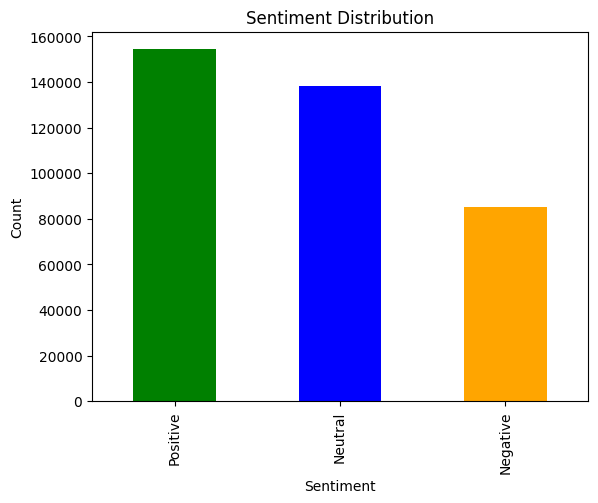

In [24]:
import matplotlib.pyplot as plt

# Visualize the sentiment distribution
sentiment_counts = new_df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


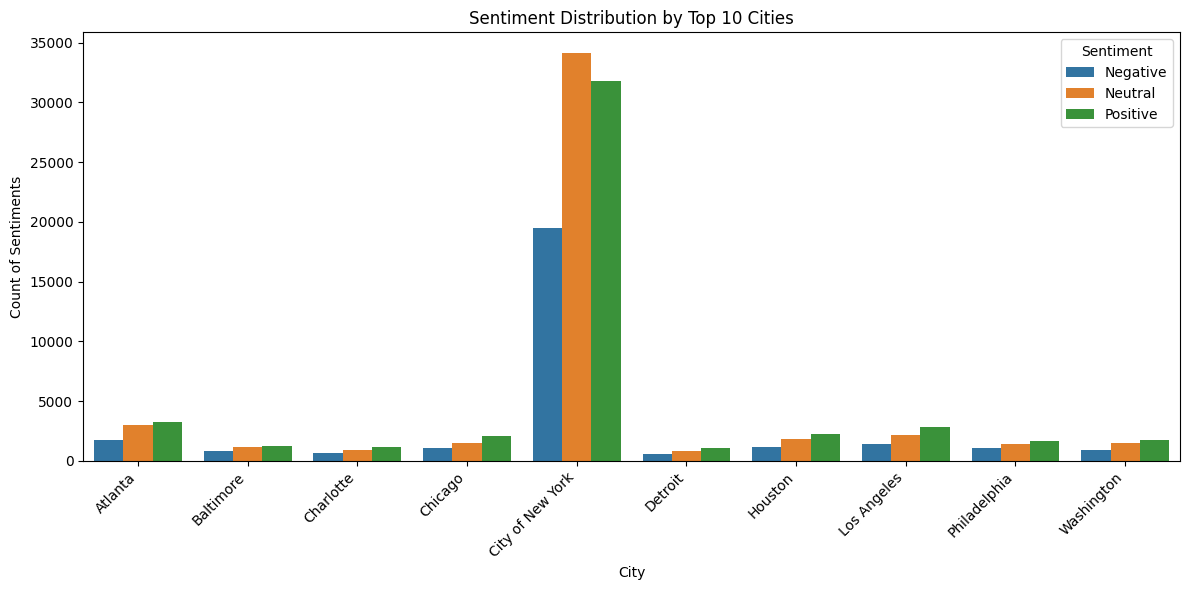

In [25]:
city_counts = new_df['city'].value_counts()
#Only take top 10 cities
top_cities = city_counts.head(10).index
filtered_df1 = new_df[new_df['city'].isin(top_cities)]

# Group by city and sentiment_label, and count occurrences
city_sentiment_count = filtered_df1.groupby(['city', 'sentiment_label']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=city_sentiment_count, x='city', y='count', hue='sentiment_label')

plt.title('Sentiment Distribution by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')


plt.tight_layout()
plt.show()

<ipython-input-26-2c5ad2d1a611>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sentiment_avg, x='city', y='sentiment_score', palette='coolwarm')


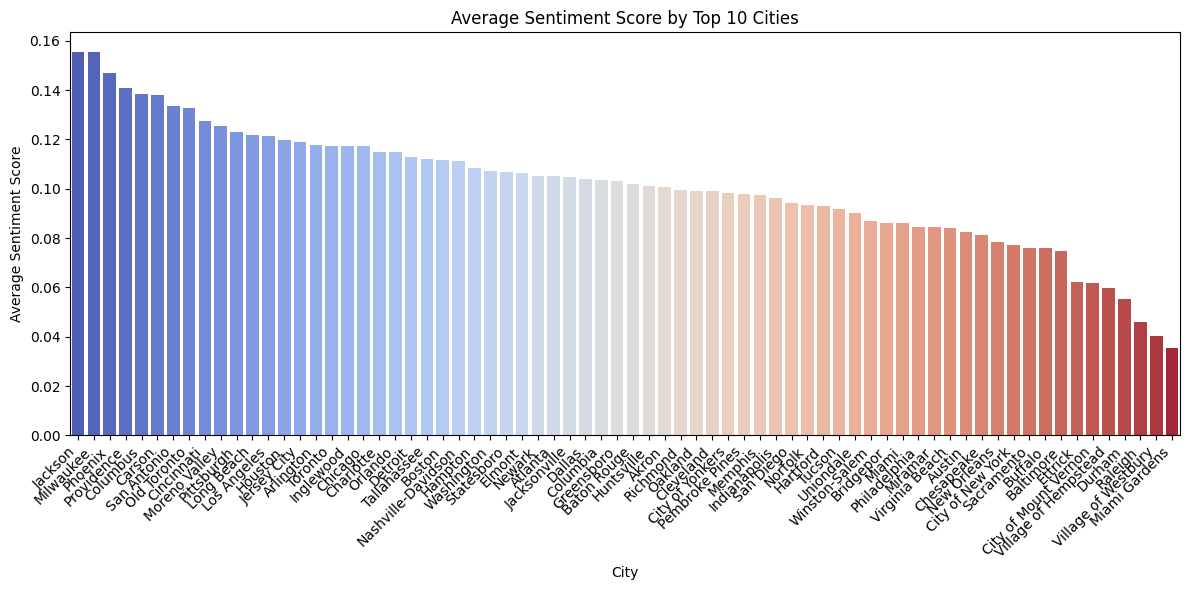

In [26]:
city_counts = new_df['city'].value_counts()

top_cities = city_counts.head(70).index
filtered_df2 = new_df[new_df['city'].isin(top_cities)]

#Group by city and calculate the average sentiment score
city_sentiment_avg = filtered_df2.groupby('city')['sentiment_score'].mean().reset_index()
city_sentiment_avg = city_sentiment_avg.sort_values(by='sentiment_score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=city_sentiment_avg, x='city', y='sentiment_score', palette='coolwarm')

plt.title('Average Sentiment Score by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [1]:
!pip install transformers torch

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load BERTweet model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", normalization=True)
model = AutoModelForSequenceClassification.from_pretrained("vinai/bertweet-base")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from torch.utils.data import DataLoader

# Take a random sample of 6,000 tweets
sampled_data = new_df.sample(n=6000, random_state=42).reset_index(drop=True)
model.eval()  # Set model to evaluation mode

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define prediction function using a small batch size
def batch_predict_sentiment(texts, batch_size=16):
    # Tokenize all at once to reduce overhead
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True)
    # Split into batches
    batched_inputs = [inputs[i:i+batch_size] for i in range(0, len(inputs['input_ids']), batch_size)]

    predictions = []
    with torch.no_grad():
        for batch in batched_inputs:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            batch_predictions = torch.argmax(probs, dim=-1).cpu().numpy()  # Move results to CPU
            predictions.extend(batch_predictions)

    return predictions

# Run sentiment prediction on the sampled data
sampled_data['sentiment_BERT_SMBATCH'] = batch_predict_sentiment(sampled_data['cleaned_text'].tolist(), batch_size=16)
# Mapping sentiment labels to custom emotions (happy, sad, angry, neutral)
label_map = {0: 'sad', 1: 'neutral', 2: 'happy'}
sampled_data['emotion'] = sampled_data['sentiment_BERT_SMBATCH'].map(label_map)


In [43]:
sampled_data.head(100)

,user,time,lat,lon,city,state,cleaned_text,sentiment_score,sentiment_label,sentiment_BERT_SMBATCH,emotion
0,USER_f373a352,2010-03-04T04:11:00,34.234371,-118.530878,Los Angeles,California,holding anotha mans jacket for him homo,0.0000,Neutral,1,neutral
1,USER_7641efd8,2010-03-06T15:21:43,42.407192,-83.003326,Detroit,Michigan,wowwww thank u so much ryan im glad u were bl...,0.9169,Positive,1,neutral
2,USER_6b77ca75,2010-03-06T20:33:33,33.048237,-97.023314,Lewisville,Texas,lol i can waiti got all day lol,0.6808,Positive,1,neutral
3,USER_61d69ae8,2010-03-05T15:40:17,32.925605,-117.117961,San Diego,California,,0.0000,Neutral,1,neutral
4,USER_8e3c0312,2010-03-04T17:21:17,40.867388,-73.919031,City of New York,New York,i wish u were mine damn why cant u just say da...,0.0000,Neutral,1,neutral
...,...,...,...,...,...,...,...,...,...,...,...
95,USER_897a5693,2010-03-03T04:13:08,38.591541,-121.288084,Rancho Cordova,California,hey daddy usher,0.0000,Neutral,1,neutral
96,USER_277117a0,2010-03-05T19:53:20,30.390027,-91.181295,Baton Rouge,Louisiana,asap she mad beautiful,0.1779,Positive,1,angry
97,USER_7cec153d,2010-03-05T18:02:47,40.714269,-74.005972,City of New York,New York,hello kitty gum is dum good,0.4404,Positive,1,neutral
98,USER_faecbb71,2010-03-05T05:55:30,33.578483,-85.097327,Carrollton,Georgia,rt i my bad bitty commitee,-0.5423,Negative,1,neutral


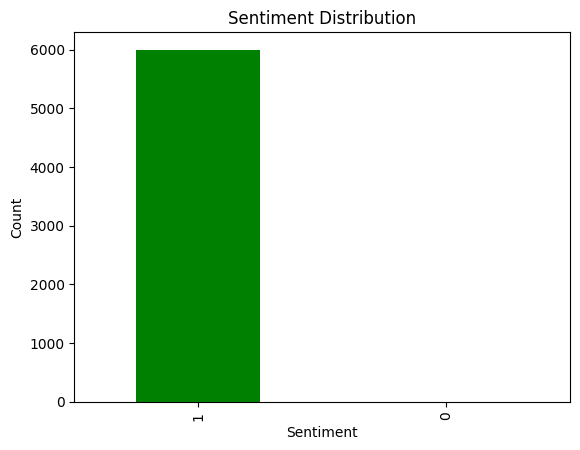

In [45]:
import matplotlib.pyplot as plt

# Visualize the sentiment distribution
sentiment_counts = sampled_data['sentiment_BERT_SMBATCH'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [34]:
# Optionally add an "angry" label for tweets with specific keywords
angry_keywords = ["angry", "furious", "mad", "annoyed", "hate", "disgusted", "irritated"]

# Define a function to detect anger based on keywords
def detect_anger(text, base_emotion):
    if any(word in text for word in angry_keywords):
        return "angry"
    return base_emotion

# Apply the anger detection to the 'emotion' column
sampled_data['emotion'] = sampled_data.apply(lambda row: detect_anger(row['cleaned_text'], row['emotion']), axis=1)

print(sampled_data[['cleaned_text', 'emotion']].head(100))


                                         cleaned_text  emotion
0            holding anotha mans jacket for him  homo  neutral
1    wowwww thank u so much ryan im glad u were bl...  neutral
2                     lol i can waiti got all day lol  neutral
3                                                      neutral
4   i wish u were mine damn why cant u just say da...  neutral
..                                                ...      ...
95                                    hey daddy usher  neutral
96                             asap she mad beautiful    angry
97                        hello kitty gum is dum good  neutral
98                      rt  i  my bad bitty commitee   neutral
99         rt  ok now it is time to  the bosses        neutral

[100 rows x 2 columns]


In [37]:
# Filter rows where the emotion column is "angry"
angry_rows = sampled_data[sampled_data['emotion'] == "angry"]

# Display the filtered rows
print(angry_rows)

               user                 time        lat         lon  \
18    USER_da9ca3d1  2010-03-05T00:29:20  37.771965 -122.148148   
23    USER_8fc3aef8  2010-03-05T08:29:53  40.672573  -73.863365   
96    USER_277117a0  2010-03-05T19:53:20  30.390027  -91.181295   
102   USER_5646ff01  2010-03-03T15:51:24  26.221462  -80.231232   
138   USER_296ba2be  2010-03-04T01:52:48  40.765512  -74.023720   
...             ...                  ...        ...         ...   
5829  USER_65515101  2010-03-05T00:35:06  33.702223  -84.404354   
5833  USER_78ae28e2  2010-03-07T19:48:21  33.902400 -118.322720   
5868  USER_e1992cb0  2010-03-06T16:52:40  40.591885  -73.810252   
5879  USER_1373b5d3  2010-03-06T00:31:18  35.753629  -78.644441   
5963  USER_791d2707  2010-03-05T23:58:22  29.906868  -89.997036   

                  city           state  \
18             Oakland      California   
23    City of New York        New York   
96         Baton Rouge       Louisiana   
102   North Lauderdale     

In [42]:
# Filter rows where the emotion column is "angry"
happy_rows = sampled_data[sampled_data['emotion'] == "happy"]

# Display the filtered rows
print(happy_rows)

Empty DataFrame
Columns: [user, time, lat, lon, city, state, cleaned_text, sentiment_score, sentiment_label, sentiment_BERT_SMBATCH, emotion]
Index: []


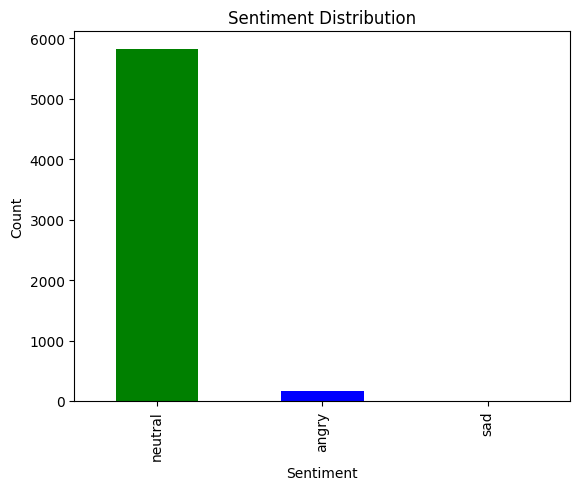

In [41]:
import matplotlib.pyplot as plt

# Visualize the sentiment distribution
# Use sampled_data instead of new_df to access the 'emotion' column
sentiment_counts = sampled_data['emotion'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()